In [1]:
import sys;sys.path.append('../hydro_py/')
from postprocess import *
import pathlib as pl
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
root = pl.Path(r'C:\Users\tmiesse\Desktop\wrf_hydro_outputs')

In [3]:
chrtout = list(root.glob('*CHRTOUT_DOMAIN*'))
chrtout = sort_files_by_time(chrtout)
outputs = open_wh_dataset(chrtout)

In [4]:
outputs.to_netcdf('chrout_domain1.nc',engine='netcdf4')

In [5]:
lats = outputs.coords['latitude'][:]
lons = outputs.coords['longitude'][:]
flow = outputs.data_vars['streamflow'][:]
ele  = outputs.data_vars['elevation'][:]
vel  = outputs.data_vars['velocity'][:]

C:\Users\tmiesse\AppData\Local\Continuum\miniconda3\envs\general\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


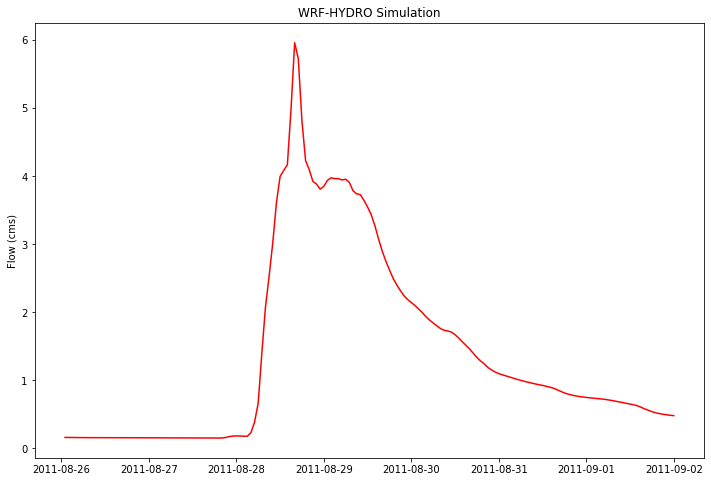

In [6]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(outputs.coords['time'].values,flow[0,:,45],'r')

plt.ylabel('Flow (cms)')
plt.title('WRF-HYDRO Simulation')
plt.show()